# 1. Missing values

In the real world, the data are rarely clean and homogenous and can have missing values for several reasons: data was lost or corrupted during the transmission from the database, human error, programming error. Whether the missing data will be removed, replaced or filled depends on the type of missing data.

`Pandas` uses the floating point value `NaN` (Not u Number) to represent missing data in both floating as well as in non-floating point arrays. The built-in Python `None` value is also treated as NA in object arrays.

There are several functions for detecting, removing, replacing and imputing null values in Pandas DataFrame.

In [249]:
# Import Pandas and Numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's look how the missing data look like in the DataFrame.

In [250]:
our_series = pd.Series([25, 2.5, 150, np.nan, 1.5, 'Python', 147])
print(our_series)

0        25
1       2.5
2       150
3       NaN
4       1.5
5    Python
6       147
dtype: object


# 2. Detecting missing data

In [251]:
# Load the Titanic dataset
data = pd.read_csv('titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


`isnull().values.any()`

- used if we only want to know if there are any missing values in the dataset

In [252]:
# Check whether there are any missing values
data.isnull().values.any()

True

`isnull()`
- it is used to detect missing values for an array-like object
- returns a boolean same-sized object indicating if the values are missing

- it is an alias of `isna()`

In [253]:
# Apply isnull() on the dataset 'data'
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


`notnull()`

- it is used to detect existing (non-missing) values
- it is an alias of `notna()`

In [255]:
# TASK 1 >>>> Check non-missing values in the dataset using .notnull()


`isnull().sum()`

- we can use function chaining to check the total number of missing values for each column in the DataFrame

In [257]:
# Count the total number of missing values in the column using .sum()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, there are 177 missing values in the column Age, then 687 missing values in the column Cabin and 2 missing values in the Embarked column.



# 3. Basic visualization of missing data

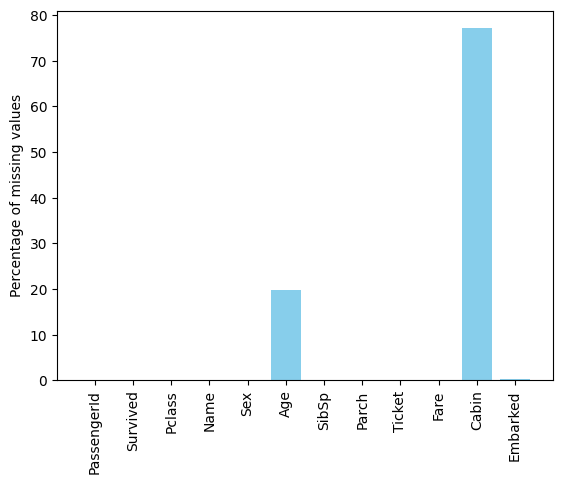

In [258]:
# Set style
plt.style.use('default')
missing_values = data.isnull().sum() / len(data) * 100
plt.xticks(np.arange(len(missing_values)), missing_values.index,rotation='vertical')
plt.ylabel('Percentage of missing values')
ax = plt.bar(np.arange(len(missing_values)), missing_values, color = 'skyblue');

# 4. Removing missing data



In some cases, it is appropriate just drop the rows with missing data, in other cases replacing missing data would be better options. 

`dropna()` function $^{1}$

- to remove rows or columns from the DataFrame which contain missing values
- by default drops any row that contain a missing value

Arguments:

`axis = 0` to drop rows

`axis = 1` to drop columns

`how = 'all'` to drop if all the values are missing

`how = 'any'` to drop if any missing value is present

`tresh = ` treshold for missing values

`subset = ['column']` to remove rows in which values are missing or selected column or columns



**If we want to make changes in the original dataset** (for example remove a particular column), we have to specify `inplace = True` within the method. Otherwise the copy of the dataset will be returned and the change will not be performed in the original dataset. 

In [259]:
# Print rows with missing data in the column 'Embarked'
missing_embarked = data[data.Embarked.isnull()]
print(missing_embarked)

     PassengerId  Survived  Pclass  ...  Fare Cabin  Embarked
61            62         1       1  ...  80.0   B28       NaN
829          830         1       1  ...  80.0   B28       NaN

[2 rows x 12 columns]


In [260]:
# Drop missing values in the column 'Embarked' 
# Specify this column using subset
# Set inplace = True
data.dropna(subset = ['Embarked'], inplace = True)

In [261]:
# Check whether the rows with missing values have been removed
data.Embarked.isna().sum()

0

In [262]:
# Make a copy of the DataFrame
data_copy = data.copy()

In [263]:
# Drop those rows that contain any missing values
# Set inplace = True
data_copy.dropna(how = 'any', inplace = True)

In [264]:
# Check whether the rows have been removed correctly
data_copy.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [265]:
# Run this code
dict = {'product': ['apple', np.nan,'cucumber','bread','milk', 'butter', 'sugar'],
        'product_code': [154,153,225,np.nan,56,15, np.nan],
        'price': [0.89, 1.50, 0.65, 1.20, 0.85, np.nan, 1.20],
        'expiration_date': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
        }

df = pd.DataFrame (dict, columns = ['product','product_code','price','expiration_date'])
print(df)

    product  product_code  price  expiration_date
0     apple         154.0   0.89              NaN
1       NaN         153.0   1.50              NaN
2  cucumber         225.0   0.65              NaN
3     bread           NaN   1.20              NaN
4      milk          56.0   0.85              NaN
5    butter          15.0    NaN              NaN
6     sugar           NaN   1.20              NaN


In [266]:
# Drop the last column that contain only missing values
# Set inplace = True
df.dropna(how = 'all', axis = 1, inplace = True)

In [267]:
# Display the DataFrame to check the change
df

,product,product_code,price
0,apple,154.0,0.89
1,NaN,153.0,1.50
2,cucumber,225.0,0.65
3,bread,NaN,1.20
4,milk,56.0,0.85
5,butter,15.0,NaN
6,sugar,NaN,1.20


In [268]:
# Run this code
df_copy = df.copy()
print(df_copy)

    product  product_code  price
0     apple         154.0   0.89
1       NaN         153.0   1.50
2  cucumber         225.0   0.65
3     bread           NaN   1.20
4      milk          56.0   0.85
5    butter          15.0    NaN
6     sugar           NaN   1.20


In [269]:
# TASK 2 >>>> Drop rows from df_copy that contain any missing values 
#             Set inplace = True
df_copy.dropna(how = 'any',inplace = True)
print(df_copy)

    product  product_code  price
0     apple         154.0   0.89
2  cucumber         225.0   0.65
4      milk          56.0   0.85


# 5. Filling in missing data

`fillna()` function $^{2}$

- this method fill in missing data (can be used on a particular column as well)

Arguments:

- we can specify **value** (any number or summary statistics such as mean or median) 

- we can use **interpolation method**: 

`ffill` : uses previous valid values to fill gap

`bfill` : uses next valid value to fill gap

`limit` : for ffill and bfill - maximum number of consecutive periods to fill

`axis` : axis to fill on, default axis = 0 

`inplace = True`



In [270]:
# Fill in missing value in 'price' column with value 0
# Set inplace = True
df.price.fillna(0, inplace = True)
print(df)

    product  product_code  price
0     apple         154.0   0.89
1       NaN         153.0   1.50
2  cucumber         225.0   0.65
3     bread           NaN   1.20
4      milk          56.0   0.85
5    butter          15.0   0.00
6     sugar           NaN   1.20


In [271]:
# Fill in missing value in column 'product' with '0'
# Set inplace = True
df.product.fillna('0', inplace = True)
print(df)

    product product_code  price
0     apple          154   0.89
1         0          153   1.50
2  cucumber          225   0.65
3     bread            0   1.20
4      milk           56   0.85
5    butter           15   0.00
6     sugar            0   1.20


In [283]:
# Run this code
dictionary = {'column_a': [15, 16, 82, 25],
              'column_b': [np.nan, np.nan, 54, 8],
              'column_c': [np.nan, 15, 15, 25],
              'column_d': [85, 90, np.nan, np.nan]
        }

dataframe_1 = pd.DataFrame (dictionary, columns = ['column_a','column_b','column_c','column_d'])
print(dataframe_1)

   column_a  column_b  column_c  column_d
0        15       NaN      10.0      85.0
1        16       NaN      15.0      90.0
2        82      54.0      15.0       NaN
3        25       8.0      25.0       NaN


In [273]:
# TASK 3 >>>> Fill in missing value in column 'column_c' of dataframe_1 with value 10 
#             Set inplace = True
dataframe_1.column_c.fillna(10, inplace = True)
print(dataframe_1)

   column_a  column_b  column_c  column_d
0        15       NaN      10.0      85.0
1        16       NaN      15.0      90.0
2        82      54.0      15.0       NaN
3        25       8.0      25.0       NaN


# 6. More Complex Methods

We will go through the theory of these more complex methods later as they relate to Machine Learning. 

In [274]:
# Run this code
dict = {'column_1': [15, 16, 82, 25],
        'column_2': [np.nan, np.nan, 54, 8],
        'column_3': [np.nan, 15, 15, 25],
        'column_4': [85, 90, np.nan, np.nan]
        }

our_df = pd.DataFrame (dict, columns = ['column_1','column_2','column_3','column_4'])
print(our_df)

   column_1  column_2  column_3  column_4
0        15       NaN       NaN      85.0
1        16       NaN      15.0      90.0
2        82      54.0      15.0       NaN
3        25       8.0      25.0       NaN


In [275]:
# Fill in missing values using 'method = bfill' which stand for 'backward fill'
# Set inplace = True
our_df.fillna(axis = 0, method = 'bfill', inplace = True)
print(our_df)

   column_1  column_2  column_3  column_4
0        15      54.0      15.0      85.0
1        16      54.0      15.0      90.0
2        82      54.0      15.0       NaN
3        25       8.0      25.0       NaN


The second option is `method = 'ffill'` which stand for forward fill.

In [276]:
# Convert the datatype of the column Age from the DataFrame 'data' to integer data type
data_copy.Age = data_copy.Age.astype('int')

In [277]:
# Fill in missing data of the column 'Age' in the DataFrame 'data' with the average age
average_age = data_copy.Age.mean()
data_copy.Age.fillna(average_age, inplace = True)

In [278]:
# Check whether missing values have been removed from the column 'Age'
data_copy.Age.isnull().sum()

0

# 7. Duplicate data


In [284]:
# Run this code
actors = [('Michone', 30, 'USA'),
            ('Bob', 28, 'New York'),
            ('Rick', 30, 'New York'),
            ('Carol', 40, 'Paris'),
            ('Daryl', 35, 'London'),
            ('Daryl', 35, 'London'),
            ('Michone', 45, 'London'),
            ('Morgan', 38, 'Sweden')
            ]
df_2 = pd.DataFrame(actors, columns=['first_name', 'age', 'city'])

In [285]:
# Find duplicated values using .duplicated() method
df_2.duplicated().sum()

1

In [287]:
# Remove duplicate rows
# Set inplace = True
df_2.drop_duplicates(inplace=True)
print(df_2)

  first_name  age      city
0    Michone   30       USA
1        Bob   28  New York
2       Rick   30  New York
3      Carol   40     Paris
4      Daryl   35    London
6    Michone   45    London
7     Morgan   38    Sweden


In [282]:
# BONUS TASK >>> What movie series does author of this notebook like? :)

# Appendix

Data source: https://www.kaggle.com/hesh97/titanicdataset-traincsv

License: CC0: Public Domain

# References

$^{1}$ Pandas documentation. 2020. pandas.DataFrame.dropna. [ONLINE] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html. [Accessed 14 September 2020].

$^{2}$ Pandas documentation. 2020. pandas.DataFrame.fillna. [ONLINE] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html. [Accessed 14 September 2020].